In [127]:
#load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score    # Easier way to use K-fold validation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

Loading and investigating the dataset

In [128]:
df = pd.read_csv("heloc_dataset_v1.csv")
pd.set_option('display.max_columns', None) #to show all columns
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,3,5,23,1,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,0,8,7,0,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,7,8,9,4,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,6,6,30,3,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,7,8,12,0,25,0,1,1,51,89,3,1,0,80


In [129]:
# Replace "Bad" and "Good" in RiskPerformance with numcerial values 

labelencoder = preprocessing.LabelEncoder()

df["RiskPerformance"] = labelencoder.fit_transform(df["RiskPerformance"])

df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,NumTotalTrades,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,0.478057,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,5.510183,20.856965,1.253083,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,0.499542,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,3.971182,14.580905,3.068684,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.000000,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,5.000000,12.000000,0.000000,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,0.000000,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,6.000000,20.000000,1.000000,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,1.000000,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,8.000000,29.000000,3.000000,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,1.000000,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,8.000000,104.000000,19.000000,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Many potential outliers as max values are often a lot higher than 75% percentile. Also often -9 as min value because it means "No Bureau Record or No Investigation". 

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   RiskPerformance                     10459 non-null  int32
 1   ExternalRiskEstimate                10459 non-null  int64
 2   MSinceOldestTradeOpen               10459 non-null  int64
 3   MSinceMostRecentTradeOpen           10459 non-null  int64
 4   AverageMInFile                      10459 non-null  int64
 5   NumSatisfactoryTrades               10459 non-null  int64
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64
 8   PercentTradesNeverDelq              10459 non-null  int64
 9   MSinceMostRecentDelq                10459 non-null  int64
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64
 11  MaxDelqEver                         10459 non-null  int64
 12  NumT

The dataset has no missing values and after the label encoding only has integer values.

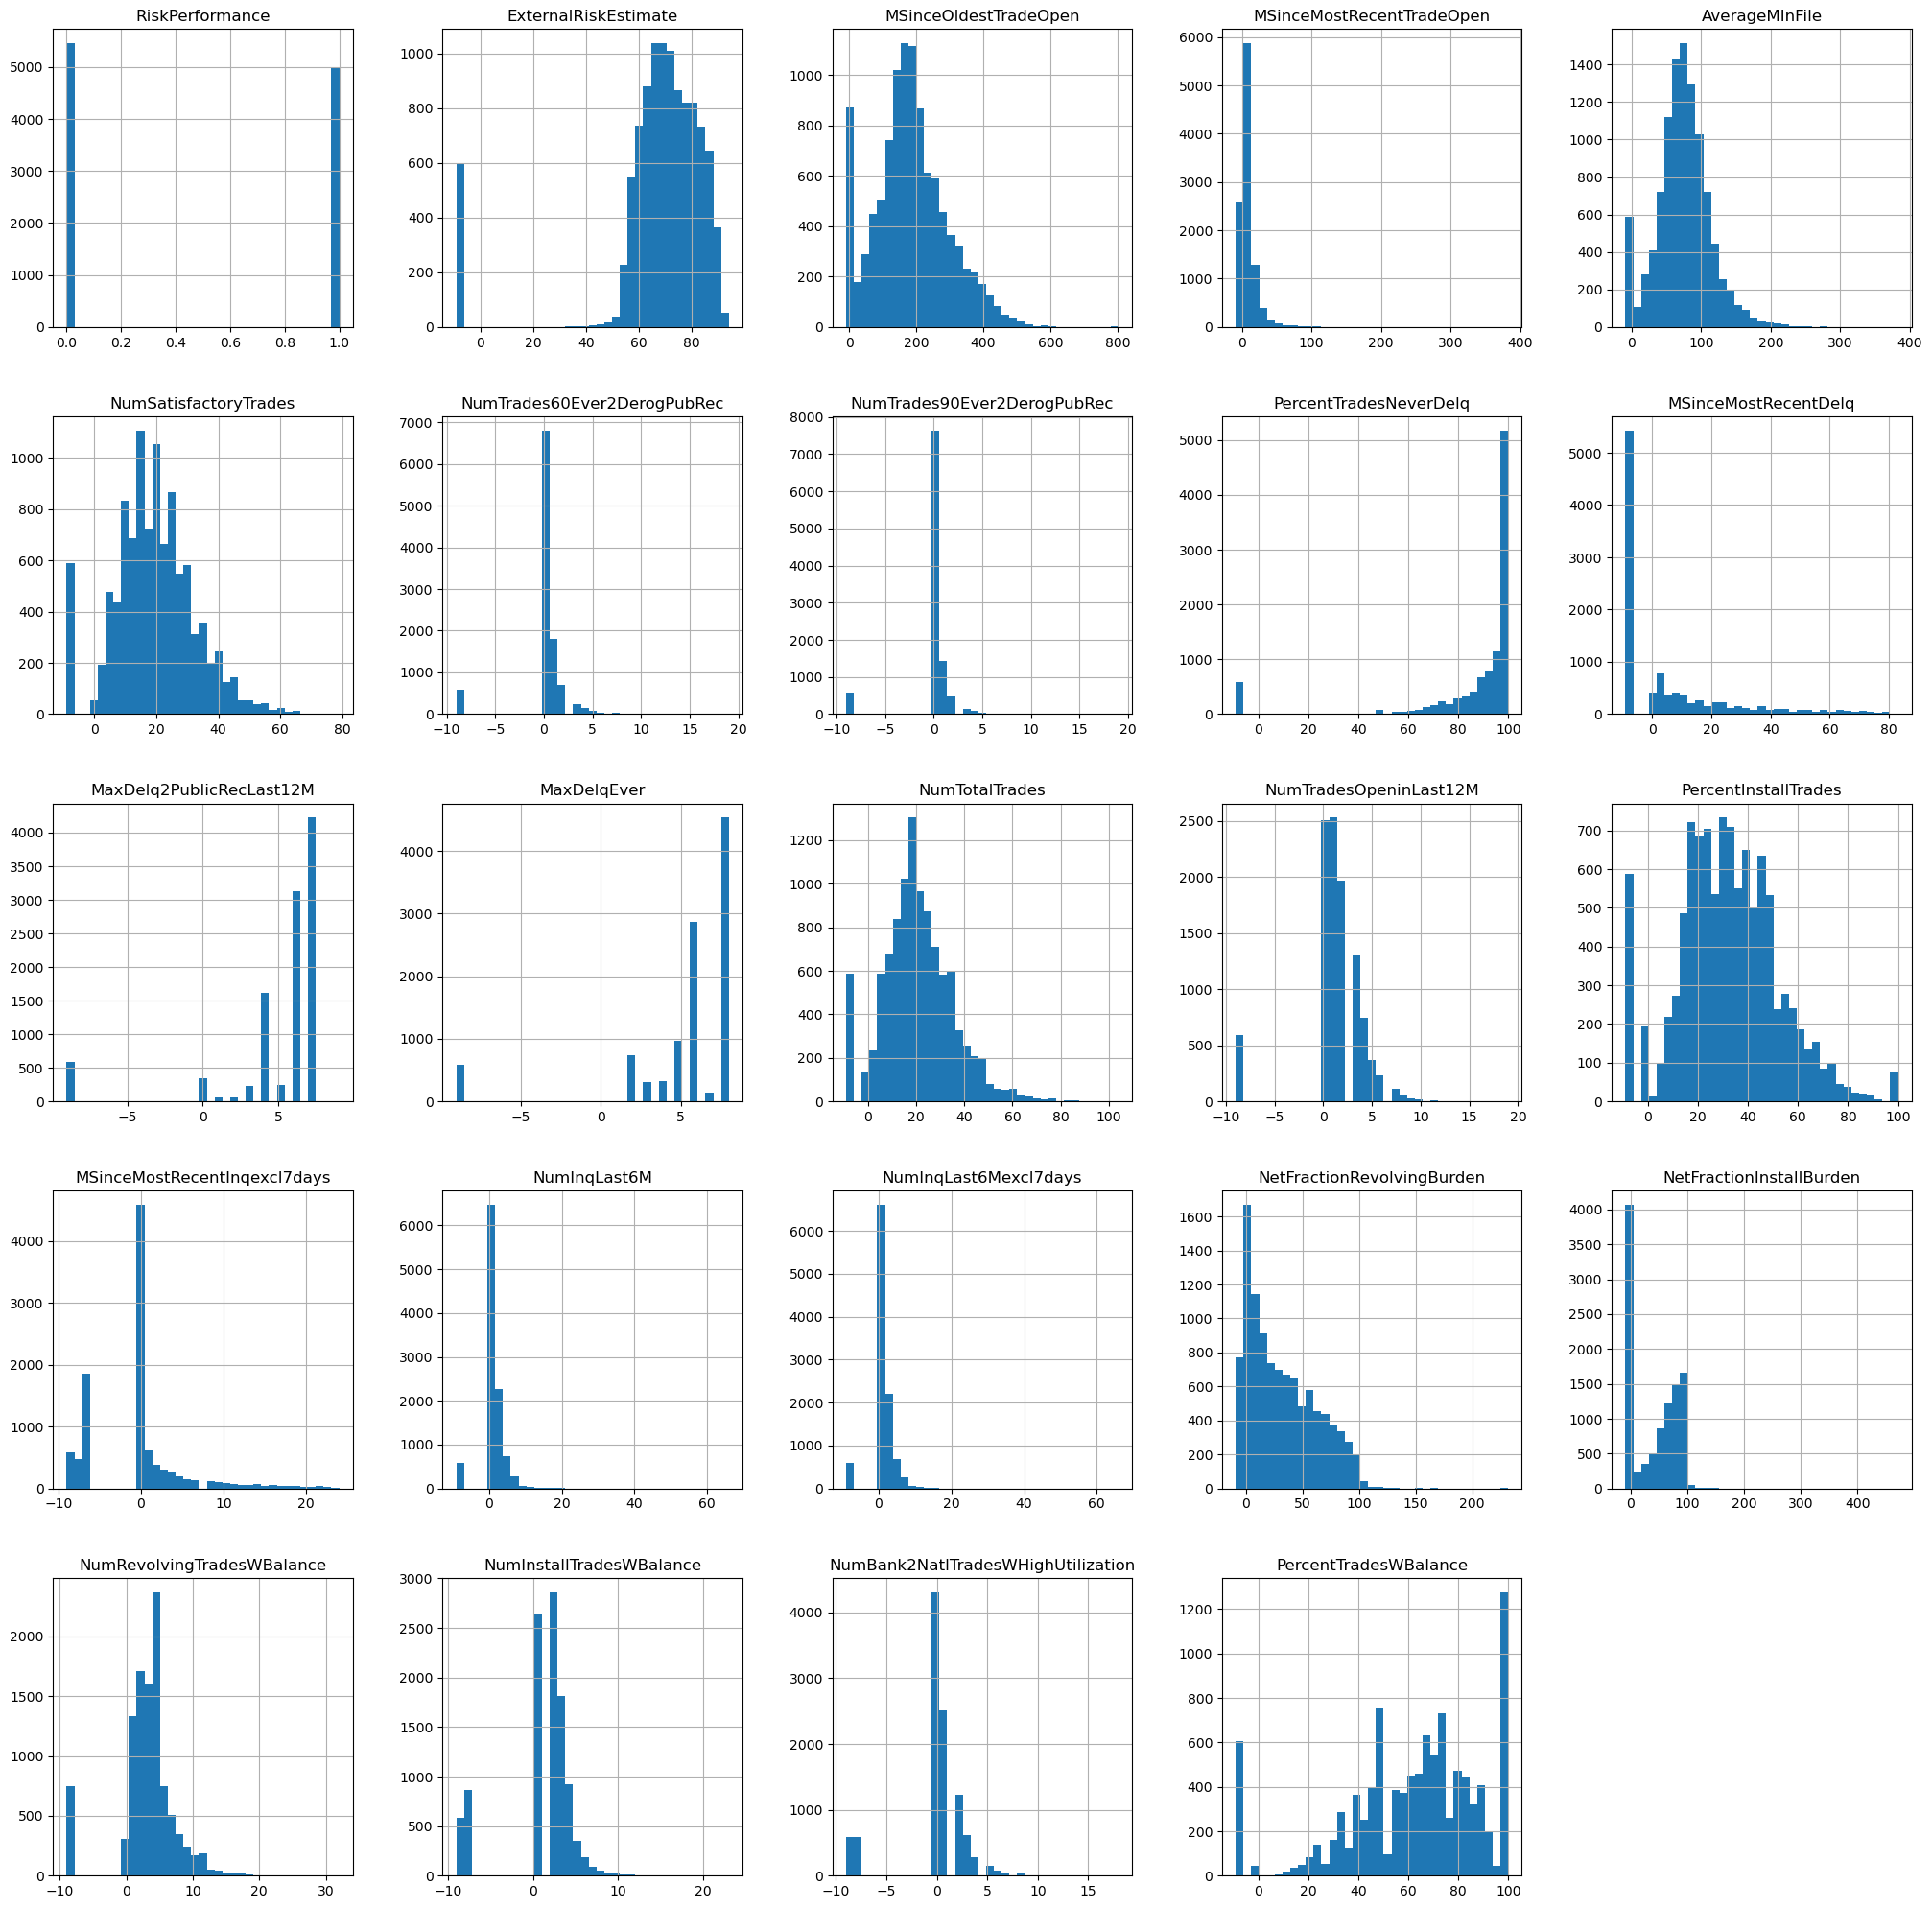

In [131]:
df.hist(bins=35, figsize=(25,25))
plt.show()

There is a good balance between good and bad risk performance, which is important as this is the target variable. The negative values are coming from the predefined special values, see dictionary. For a number of variables, the vast majority of values is the value 0. If these variables still add value or if they can be deleted will be seen with the PCA.  

Outlier Detection

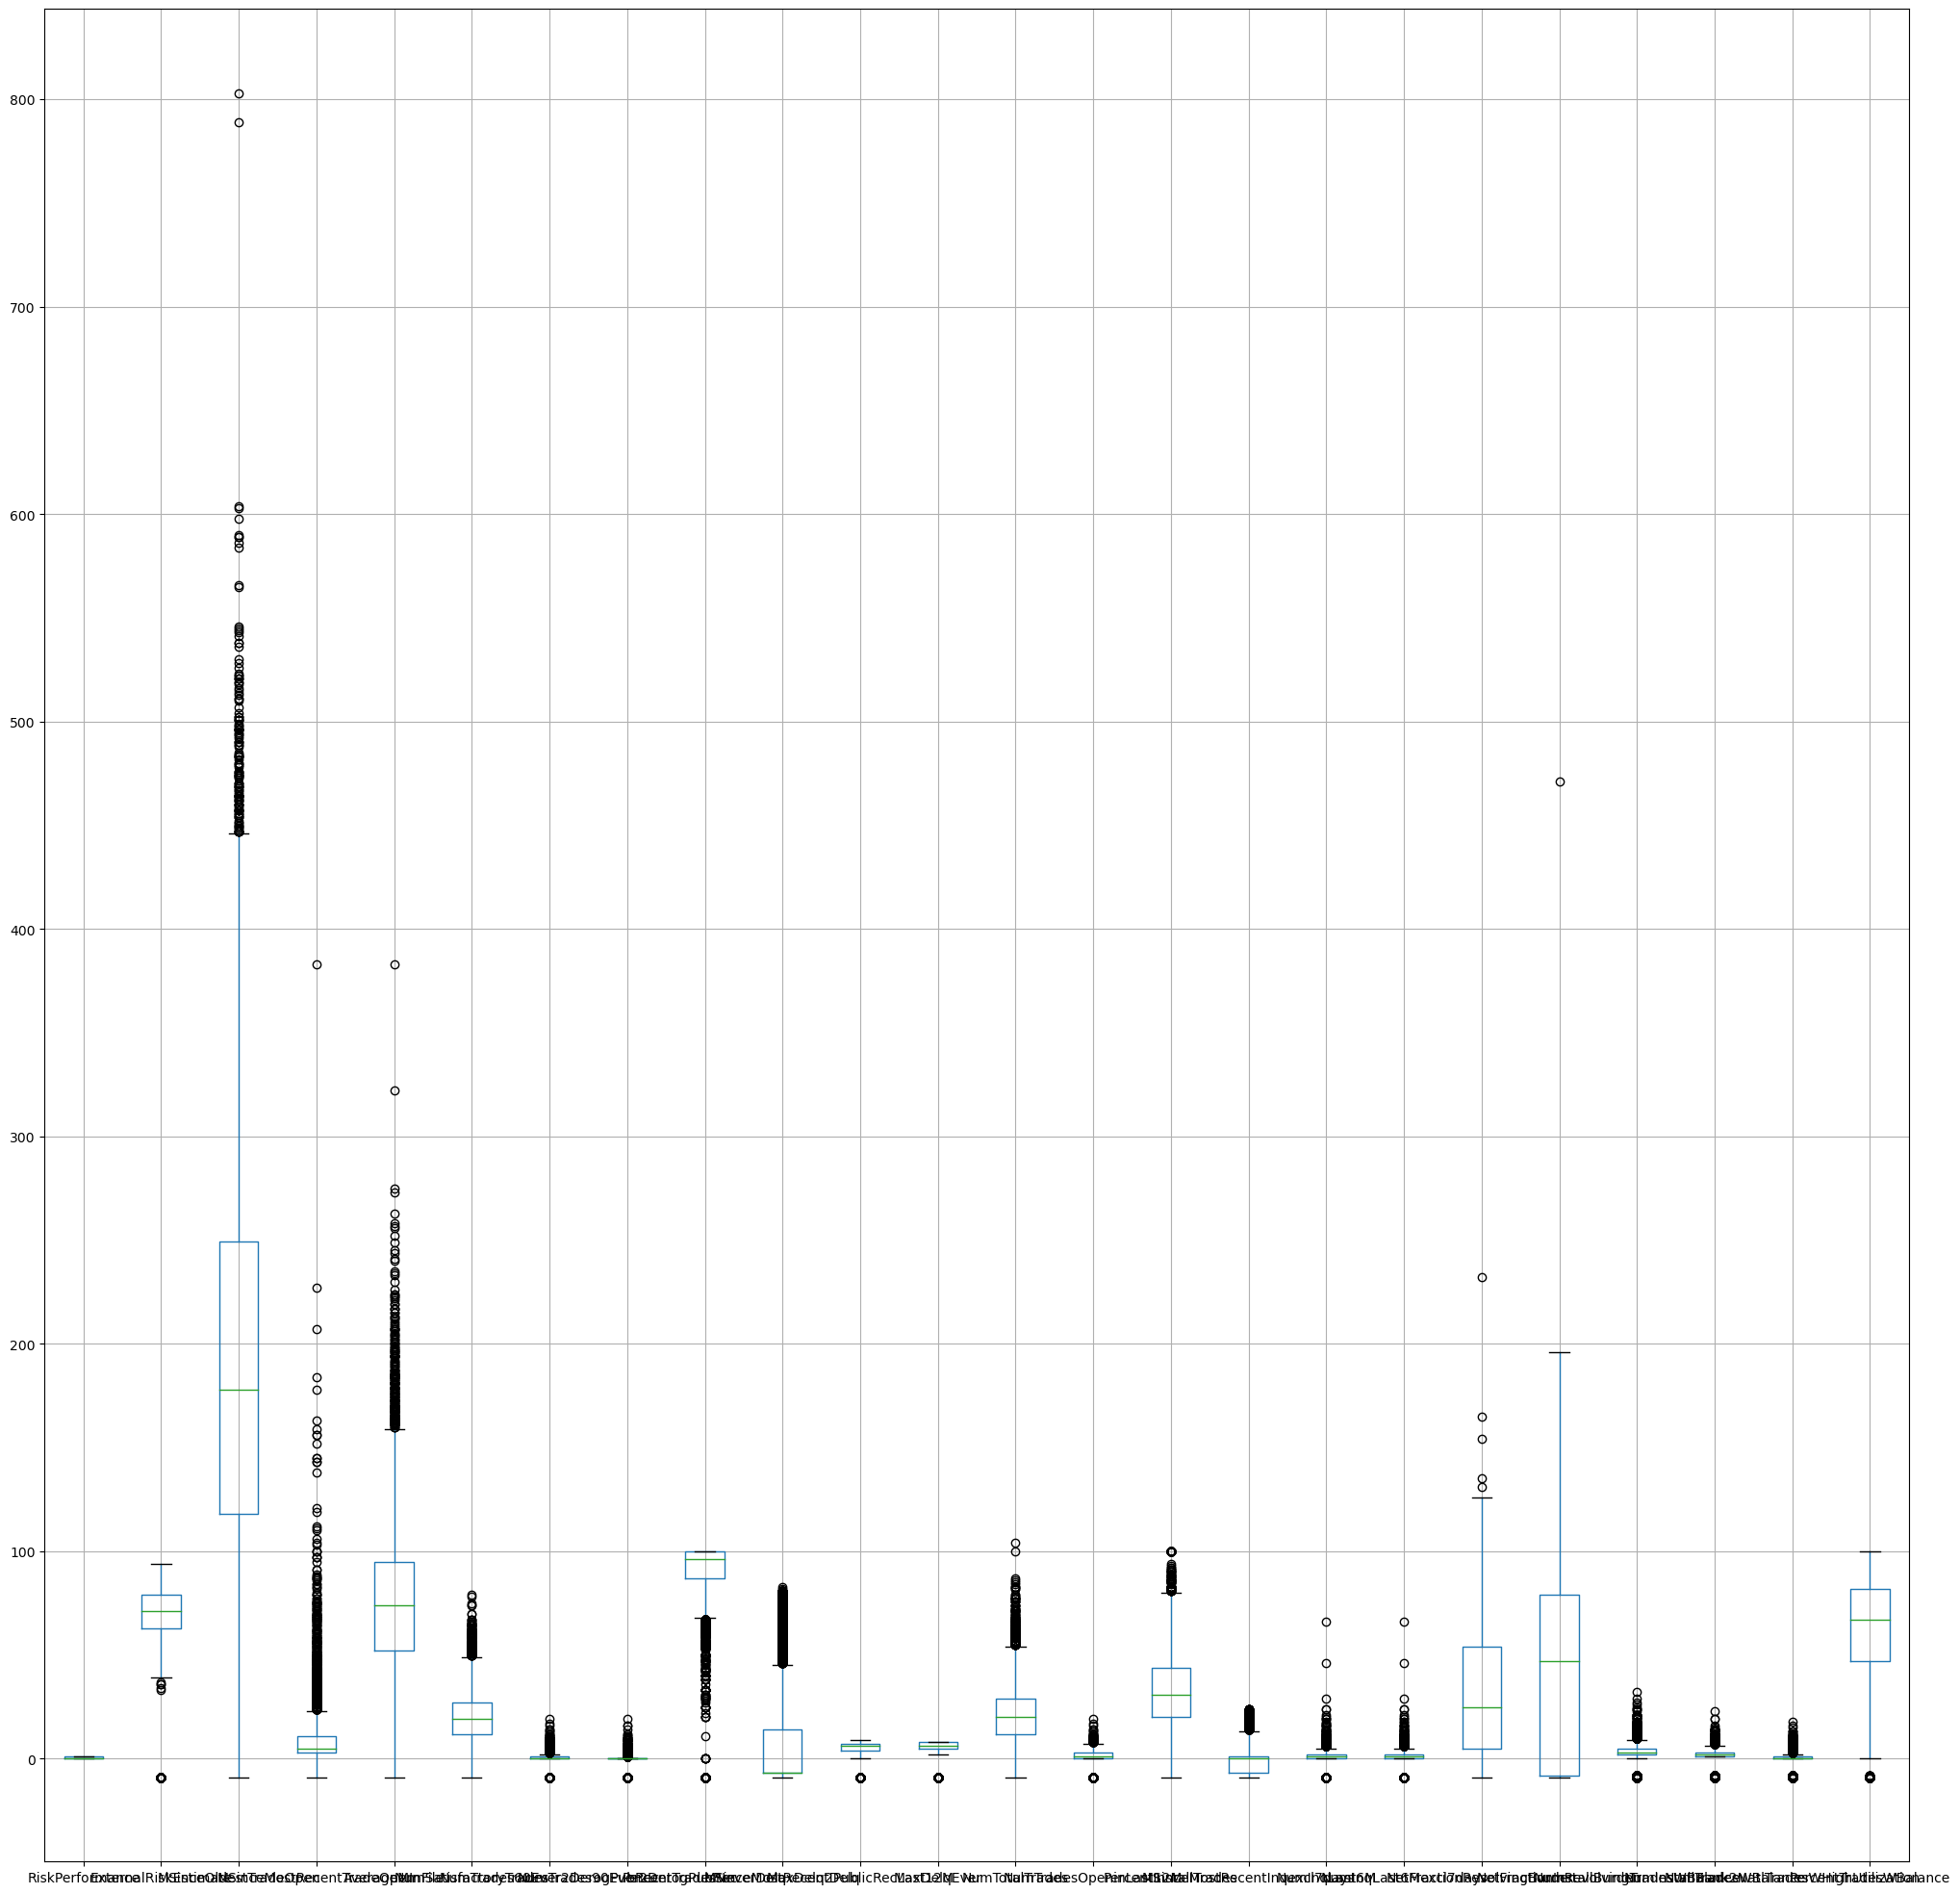

In [132]:
df.boxplot(figsize=(25,25))
plt.show()

Many outliers. But replacing the outlier values with the mean or deleting the entries with outliers dramatically decreases the accuracy. Decision trees and random forest are more robust against outliers. 

In [133]:
def outlier_handling(df, threshold):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
   
    # Count the number of outliers for each row
    outliers = ((df < (q1 - threshold * iqr)) | (df > (q3 + threshold * iqr))).sum(axis=1)

    # Filter the dataframe to only include rows with 3 or more outliers across all columns
    entries_with_outliers = df[outliers >= 3]
    
    indices_to_drop = entries_with_outliers.index.tolist()

    # drop the rows with the obtained indices
    df = df.drop(indices_to_drop)
    return df

df = outlier_handling(df, 1.5)

The function outlier_handling removes entries that have 3 or more outliers across all variables. Thereby, the accuracy increases by +2 and +3 for the Bayes classifier and random forest, respectively. Defining that entries with 3 or more outliers are removed proofed to produce output because otherwise too many or too few entries would be removed. 

Normalizing both dataframes

In [134]:
scaler = MinMaxScaler()

def normalizing(df):
    columns_list = df.drop("RiskPerformance", axis =1).columns.tolist()
    for column in columns_list:
        df[column] = scaler.fit_transform(df[[column]])
    return df

#To me, the different scaler do not make a difference

df = normalizing(df)

Split data
(Dimensionaliy reduction decreases the accuracy of models and is therefore not recommended.)

In [135]:
y = df.loc[:,"RiskPerformance"]
X = df.drop(["RiskPerformance"], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Bayes Classifier Random Forest

In [136]:
#prints out the classification report and confusion matrix for the models
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\033[34m{model.__class__.__name__}\033[0m")
    print(f"    \033[32mClassification Report:\033[0m")
    for line in classification_report(y_test, y_pred).split('\n'):
        print(f"        {line}")
    print(f"    \033[32mConfusion Matrix:\033[0m")
    for line in str(confusion_matrix(y_test, y_pred)).split('\n'):
        print(f"        {line}")
    print()

#build SVM and Random Forest classifiers and fit them to the training data.
random_st= 213456 #for reproduceability

#svm = SVC(kernel='linear',random_state=random_st)
#svm.fit(X_train, y_train)

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=50,max_leaf_nodes=30, random_state=random_st)
rf.fit(X_train, y_train)

#evaluate(svm, X_test, y_test)
evaluate(gnb, X_test, y_test)
evaluate(rf, X_test, y_test)

GaussianNB
    Classification Report:
                      precision    recall  f1-score   support
        
                   0       0.74      0.65      0.69       857
                   1       0.69      0.78      0.73       867
        
            accuracy                           0.71      1724
           macro avg       0.72      0.71      0.71      1724
        weighted avg       0.72      0.71      0.71      1724
        
    Confusion Matrix:
        [[553 304]
         [192 675]]

RandomForestClassifier
    Classification Report:
                      precision    recall  f1-score   support
        
                   0       0.73      0.74      0.73       857
                   1       0.74      0.73      0.73       867
        
            accuracy                           0.73      1724
           macro avg       0.73      0.73      0.73      1724
        weighted avg       0.73      0.73      0.73      1724
        
    Confusion Matrix:
        [[631 226]
         [2

Grid search for random forest

In [137]:
#param_grid = {'n_estimators': [50, 100, 250,350,500],
#              'max_leaf_nodes': [10, 15, 20, 25,30]}
#grid = GridSearchCV(rf, param_grid)
#
#%time grid.fit(X_train, y_train)
#print(grid.best_params_)

In [138]:
n_estimators = [50, 100, 250,350,500]
max_leaf_nodes = [5, 10, 15, 20,25]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,6,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [139]:
param_grid = {'n_estimators': n_estimators,
               'max_leaf_nodes': max_leaf_nodes,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 100, 250, 350, 500], 'max_leaf_nodes': [5, 10, 15, 20, 25], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 6, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [140]:
#rf = RandomForestClassifier()

In [141]:
#rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [142]:
#rf_Grid.fit(X_train, y_train)

In [143]:
#rf_Grid.best_params_

In [144]:
#print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
#print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')
#no overfitting

In [145]:
#y_pred = rf_Grid.predict(X_test)
#print(f"\033[34m{rf_Grid.__class__.__name__}\033[0m")
#print(f"    \033[32mClassification Report:\033[0m")
#for line in classification_report(y_test, y_pred).split('\n'):
#    print(f"        {line}")